МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем отличается AdaBoost от XGBoost? Перечислите принципиальные отличия. 

В XGBoost для оптимизации в пространстве ответов базовых алгоритмов используются методы второго порядка. В XGBoost функцонал регуляризуется, в AdaBoost нет. В (классическом) AdaBoost используется экспоненциальная функция потерь. В XGBoost используется измененный критерий информативности.

**Вопрос 2**: Почему говорят, что AdaBoost неустойчив к выбросам?

AdaBoost использует экспоненциальную функцию потерь, которая сильно карает за misclassification. Шумовые данные обычно лежат глубоко в своем классе, но имеют неправильный лейбл. В идеале хотелось бы, чтобы шумовые данные были корректно класифицированы алгоритмом, но это не возможно так как тогда это будет грубый misclassification (потому что обучающий алгоритм не знает, что метка на шумовом объекте не правильная) 

**Вопрос 3**:  В каком пространстве градиентный бустинг совершает градиентный спуск? Какова размерность этого пространства?

В пространстве ответов базовых алгоритмов. Если обучающая выборка $X^{(l)}$, то размерность пространства -- $l$.

**Вопрос 4**: В чем заключается сокращение шага в градиентном бустинге? Как число итераций, необходимое для сходимости, зависит от размера шага η?

Изменяется (уменьшается) коэфициент, с которым новый базовый алгоритм добавляется в композицию. Чем меньше размер шага, тем больше должно быть шагов алгоритма до сходимости.

**Вопрос 5**: Что такое стохастический градиентный бустинг?

На каждом шаге градиентного бустинга считаем градиент только на случайно выбранной подвыборке данных, и добавляем базовый алгоритм в композицию.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Boosting</h1> 

1) Задача 1 
![](./img/task11.png)
![](./img/task12.png)


Будем рассматривать $$f(x) = \sum_{i = 1}^l \alpha_i I\{x \in A_i\}$$ -- кусочно постоянные функции, причем $$\coprod_{i = 1}^l A_i = \mathbb{R}$$

Докажем по индукции, что через $n$ точек $(x_1, y_1), \dots, (x_n, y_n)$ на плоскости xOy можно провести кусочно-постоянную функцию c $n$ непересекающимися $A_i$, причем $x_i \in A_i$ и

$$f(x) = \sum_{i = 1}^n y_i I\{x \in A_i\}$$


База $l=1$. Пусть дана точка $(x_1, y_1)$ тогда подходит $f(x) = y_1 \cdot I\{x \in \mathbb{R}\}$

Пусть $l>1$. Рассмотрим $x_{(1)}, \dots, x_{(l)}$ -- точки в порядке соритировки. Для $x_{(1)}, \dots, x_{(l-1)}$ по предположению индукции есть кусочно постоянная 

$$f(x) = \sum_{i = 1}^{l-1} y_{(i)} I\{x \in A_i \}$$ и $x_{(i)} \in A_i$. Так как $\{x_{(i)}\}$ в порядке сортировки и $A_i$ попарно не пересекаются, то $\sup A_{(l-1)} = +\infty$, значит можно разбить $A_{(l-1)} = A_{(l-1)}' \cup A_{(l)}$, что $A_{(l-1)}' \ni x_{(l-1)}$ и $A_{(l)} \ni x_{(l)}$ Переобозначив $A_{(l-1)}'$ как $A_{(l-1)}$ получаем искомое разбиение.


Теперь решим искомую задачу. Пусть также $x_1, \dots, x_n$ отсортированы. Положим $\gamma_1 = y_1$, $\gamma_2 = y_2 - y_1$, $\gamma_3 = y_3 - y_2$, $\gamma_4 = y_4 - y_3$ и так далее. Проведем через $(x_1, 1), \dots (x_l, l)$ кусочно постоянную функцию и положим $t_i = \min_i \inf A_i$. Тогда композиция решающих пней $[x \geq t_i]$ с коэфициентами $\gamma_i$ и будет искомой композицией, кроме того, в ней будет $l$ решающих пней.

2) Найдите градиент логистичиской функции потерь для фиксированного объекта

$$\frac{d}{dz}\log(1 + \exp(-yz)) = \frac{-y}{1 + \exp{yz}}$$

<h1 align="center">Binary Boosting Implementation</h1> 

Нужно реализовать двухклассовый бустинг с логистичиской функцией потерь. 

Длину шага -- или используйте $1.0*lr$ или подбирайте одномерной оптимизацией;

In [4]:
%pylab inline

import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
from utils import plot_surface
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [5]:
class BinaryBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators, lr=0.1):
        self.lr = lr   
        self.n_estimators = n_estimators
    
    def loss_grad(self, original_y, pred_y):
        return -original_y / (1 + np.exp(original_y * pred_y))
    
    def loss(self, y_true, y_pred):
        return np.sum(np.log(1 + np.exp(-y_true * y_pred)))
        
    def fit(self, X, original_y):
        # Храните базовые алгоритмы тут
        self.estimators_ = []
        self.coefs_ = []
        
        
        zero_est = DecisionTreeRegressor(max_depth=1)
        zero_est.fit(X, np.zeros(original_y.shape))
        self.estimators_.append(zero_est)
        self.coefs_.append(1.0 * self.lr)
        
        
        for i in range(self.n_estimators):
            y_pred = self._predict(X)
            grad = self.loss_grad(original_y, y_pred)
            # Настройте базовый алгоритм на градиент, это классификация или регрессия?
            estimator = DecisionTreeRegressor(max_depth=3)
            estimator.fit(X, grad)
            grad_estimated = estimator.predict(X)
            
            f = lambda alpha: self.loss(original_y, y_pred + alpha * grad_estimated)
            f_grad = lambda alpha: self.loss_grad(original_y, y_pred + alpha * grad_estimated).dot(grad_estimated.reshape(-1, 1))
            
            ans = minimize(f, (0,), jac=f_grad)
            #print(ans.x[0])
            print("Norm grad: {}, loss func: {}, alpha min {}".format(np.sqrt(np.sum(grad ** 2)), self.loss(original_y, y_pred), ans.x[0]))
            
            self.estimators_.append(estimator)
            #self.coefs_.append(-1.0 * self.lr)
            self.coefs_.append(ans.x[0])
        
        self.grad_abs_ = np.abs(grad)
        self.out_ = self.outliers(self.grad_abs_)

        return self

    def _predict(self, X):
        y_pred = np.zeros(len(X))
        for est, coef in zip(self.estimators_, self.coefs_):
            y_pred += coef * est.predict(X)
        return y_pred
    
    def predict(self, X):
        y_pred = self._predict(X)
        return y_pred > 0
    
    def outliers(self, grad):
        return np.argsort(grad)[:-10:-1]

<h1 align="center">Simple test</h1> 

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
y = 2*(y-0.5)

Norm grad: 11.1803398875, loss func: 346.57359028, alpha min -5.45913127324
Norm grad: 8.06237688425, loss func: 207.317563181, alpha min -6.93077056677
Norm grad: 7.66902982893, loss func: 190.292275912, alpha min -5.3813811553
Norm grad: 7.06703745768, loss func: 167.584809152, alpha min -17.024309054
Norm grad: 6.79755178494, loss func: 155.137825733, alpha min -9.57064408461
Norm grad: 6.3384249507, loss func: 137.684532922, alpha min -11.628530604
Norm grad: 6.18729665014, loss func: 131.033017123, alpha min -10.4838788131
Norm grad: 5.99702328834, loss func: 124.5599124, alpha min -14.0309644046
Norm grad: 5.67659426004, loss func: 113.152451271, alpha min -7.95327628159
Norm grad: 5.49322187895, loss func: 108.341606773, alpha min -9.9921330865
Norm grad: 5.24172999335, loss func: 100.472140829, alpha min -10.5552212678
Norm grad: 4.95398165761, loss func: 90.4228652012, alpha min -13.0039654557
Norm grad: 4.71047066867, loss func: 83.049079064, alpha min -14.9468001473
Norm gra

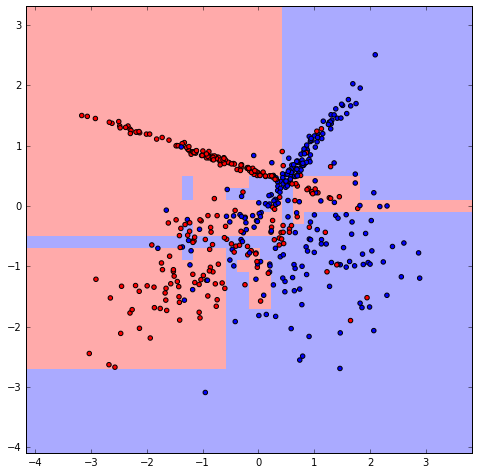

In [7]:
clf = BinaryBoostingClassifier(n_estimators=20).fit(X, y)
print(accuracy_score(y == 1, clf.predict(X)))
plot_surface(X, y, clf)

<h1 align="center">Outliers</h1> 

In [8]:
clf.grad_abs_[clf.out_]

array([ 0.96864752,  0.87046767,  0.83036403,  0.78936746,  0.75110789,
        0.58380078,  0.56346239,  0.56346239,  0.55231038])

In [9]:
clf.out_

array([416, 206, 191, 235, 317, 390, 153,  20, 458])

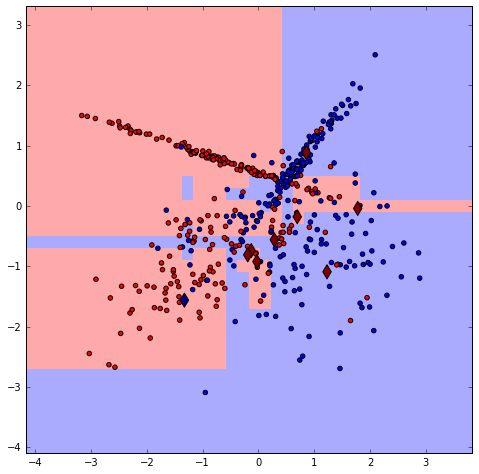

In [10]:
plot_surface(X, y, clf)
plt.scatter(X[clf.out_].T[0], X[clf.out_].T[1], s=100, c=-y[clf.out_], marker='d')

<h1 align="center">Adult test</h1> 

In [11]:
#!sh ./get_data.sh

In [12]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [13]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)

In [14]:
X_train, y_train, X_test, y_test = X[:25000], y[:25000], X[25000:], y[25000:]

In [15]:
clf = BinaryBoostingClassifier(n_estimators=25, lr=3.0)
clf.fit(X_train, y_train)

Norm grad: 79.0569415042, loss func: 17328.679514, alpha min -5.99391682024
Norm grad: 53.8037751401, loss func: 9183.26868376, alpha min -7.6878974837
Norm grad: 51.6719344531, loss func: 8475.86884529, alpha min -8.13638891131
Norm grad: 50.8749311846, loss func: 8209.64018848, alpha min -7.91726667283
Norm grad: 50.4695987347, loss func: 8073.30235535, alpha min -7.43428217503
Norm grad: 49.8113256634, loss func: 7876.00115858, alpha min -10.2370220352
Norm grad: 49.4655688716, loss func: 7746.80819648, alpha min -8.57427243972
Norm grad: 48.9032358373, loss func: 7587.06660374, alpha min -7.90975010157
Norm grad: 48.658881982, loss func: 7507.15859252, alpha min -7.0481527187
Norm grad: 48.3868709008, loss func: 7434.0746295, alpha min -8.67199975554
Norm grad: 48.1583084619, loss func: 7374.69076452, alpha min -8.81726464768
Norm grad: 48.0131663586, loss func: 7334.41510754, alpha min -12.9620744367
Norm grad: 47.8160243349, loss func: 7266.17514684, alpha min -8.93904382619
Norm

BinaryBoostingClassifier(lr=3.0, n_estimators=25)

In [16]:
accuracy_score(y_train == 1, clf.predict(X_train))

0.878

In [17]:
accuracy_score(y_test == 1, clf.predict(X_test))

0.86602301282899086

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=4, max_features="sqrt")
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.99996
0.853061764317


In [19]:
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.86188
0.8603359344


<h1 align="center">Text classification</h1> 

- Найдите двухклассовый текстовый датасет (в качестве примера sentiment analysis) или возьмите многоклассовый и классифцируйте один клас против остальных
- Попробуйте бустинг на решающих деревьях, в качестве фичей используйте tf-idf и svd/random_projection/hashing_trick, что работает лучше? Сравните качество и время работы.

Будем использовать https://www.kaggle.com/crowdflower/twitter-airline-sentiment


Сначала попробуем tf-idf в качетсве фичей. Посчитаем accuracy на тесте после обучения на трейне.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.cross_validation import train_test_split

data = pd.read_csv("Tweets.csv")
X, y = data["text"].values, (data["airline_sentiment"] != "negative").values
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X).toarray()
y = 2*(y.astype(int) - 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
clf = BinaryBoostingClassifier(n_estimators=10)
clf.fit(X_train, y_train)
print(accuracy_score(y_train == 1, clf.predict(X_train)))
print(accuracy_score(y_test == 1, clf.predict(X_test)))

Norm grad: 52.3927475897, loss func: 7610.75604255, alpha min -4.46146423021
Norm grad: 47.2411812505, loss func: 6520.04430887, alpha min -4.97714504381
Norm grad: 45.3213048047, loss func: 6112.17219089, alpha min -6.05341302122
Norm grad: 44.2023467315, loss func: 5847.14835782, alpha min -6.93305611616
Norm grad: 43.3649627058, loss func: 5656.16087298, alpha min -7.38469058198
Norm grad: 42.5760475988, loss func: 5465.05576918, alpha min -6.2835785479
Norm grad: 41.9137757955, loss func: 5326.80286253, alpha min -12.1758491967
Norm grad: 41.412220504, loss func: 5209.72462287, alpha min -6.53762036884
Norm grad: 40.9356558861, loss func: 5102.81534233, alpha min -6.81587073165
Norm grad: 40.4313921265, loss func: 5002.18541873, alpha min -7.09007022313
0.790528233151
0.771038251366


Как видим, accuracy около 77%. Попробуем сравнить с RandomForest.

In [22]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=4, max_features="sqrt")
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.998816029144
0.807923497268


Оказывается, RandomForest получается на 3 процентра лучше.

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.880783242259
0.838524590164


Логистическая регрессия оказывается вне конкуренции с 84% accuracy.

Теперь попробуем HashingTrick. Интересно узнать, как он будет влиять на логистическую регрессию и подходы, основанные на решающих деревьях

In [24]:
data = pd.read_csv("Tweets.csv")
X, y = data["text"].values, (data["airline_sentiment"] != "negative").values
vectorizer = HashingVectorizer(n_features = 3000)
X = vectorizer.fit_transform(X).toarray()
y = 2*(y.astype(int) - 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
clf = BinaryBoostingClassifier(n_estimators=10)
clf.fit(X_train, y_train)
print(accuracy_score(y_train == 1, clf.predict(X_train)))
print(accuracy_score(y_test == 1, clf.predict(X_test)))

Norm grad: 52.3927475897, loss func: 7610.75604255, alpha min -4.39959000367
Norm grad: 47.1504648816, loss func: 6512.10168736, alpha min -5.45067527088
Norm grad: 45.2709046733, loss func: 6101.48037309, alpha min -6.87877263044
Norm grad: 44.1308003159, loss func: 5812.84692146, alpha min -5.80007189214
Norm grad: 43.3182267867, loss func: 5640.81072671, alpha min -7.02151318782
Norm grad: 42.5648161431, loss func: 5467.18330676, alpha min -7.40287134537
Norm grad: 41.988534757, loss func: 5335.37762708, alpha min -6.46793949112
Norm grad: 41.4141032019, loss func: 5216.43740123, alpha min -5.95895005236
Norm grad: 40.9077652712, loss func: 5112.72975066, alpha min -7.54388053894
Norm grad: 40.4483106863, loss func: 5011.42612974, alpha min -6.28246640429
0.792805100182
0.759016393443


In [26]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=4, max_features="sqrt")
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.999362477231
0.794808743169


In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.849908925319
0.814207650273


Как видим, hashing vectorizer (который по сути суммируют фичи при коллизии) повлиял на только линейную модель. Это логично, так как по сути предсказания линейной модели по каждой фиче сводятся к решающему пню $[f_t \leq \frac{t}{w_t}]$ при всех остальных фичях фиксированных, а модели основанные на деревьях решений умеют использовать много иерархических пней для каждый отдельно взятой фичи.

<h1 align="center">Random Forest vs Boosting</h1> 

Подберите 2+ датасета как минимум большой и маленький (не использованных в этом дз) и проведите сравнение random forest и градиентного бустинга, используйте реализации алгоритмов из библиотеки sklearn.

- Опишите результаты, почему тот или другой алгоритм на конкретном датасете работает лучше/хуже?
- Как вы настраивали гиперпараметры алгоритмов?
- Как вы проверяли качесво алгоритмов?

В качестве примера большого датасета возьмем mnist, в качетсве примера маленького - https://www.kaggle.com/aaron7sun/stocknews

Попробуем сначала датасет https://www.kaggle.com/aaron7sun/stocknews

In [419]:
df = pd.read_csv("Combined_News_DJIA.csv")
y = df["Label"].values

In [420]:
import re
def normalize(s):
    s = re.sub(r"'b", "", s)
    s = re.sub(r'"b', "", s)
    s = re.sub(r"[^a-z ]", "", s.lower())
    return s

In [421]:
columns = ["Top" + str(i) for i in range(1, 26)]
X = np.array(list(map(normalize, map(str, df[columns].values))))

Выделяем 7000 биграмм + лемматизация с помощью nltk

In [ ]:
import nltk
nltk.download()

In [381]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [422]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = HashingVectorizer(ngram_range=(2, 2), n_features=7000, tokenizer=LemmaTokenizer())
X = vectorizer.fit_transform(X).toarray()

In [423]:
X_train, y_train, X_test, y_test = X[:1600], y[:1600], X[1600:], y[1600:]

In [425]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.53984575835475579

In [426]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.50128534704370176

Качество на тесте получилось чет не очень :( Если убрать лемматизацию для логистической регрессии плолучается чутьт лучше.

In [427]:
df = pd.read_csv("Combined_News_DJIA.csv")
y = df["Label"].values
columns = ["Top" + str(i) for i in range(1, 26)]
X = np.array(list(map(normalize, map(str, df[columns].values))))
vectorizer = HashingVectorizer(ngram_range=(2, 2), n_features=7000)
X = vectorizer.fit_transform(X).toarray()
X_train, y_train, X_test, y_test = X[:1600], y[:1600], X[1600:], y[1600:]
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

0.54498714653
0.488431876607


Есть мнение, что эта задача (предсказание рынка по загаловкам новостей) вообще не решаема. Так что лучше перейдем к MNIST

In [28]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [29]:
X = mnist["data"]
y = mnist["target"]

Возьмем подвыборку исходной выборки, чтобы обучалось быстрее.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=1000)

Сравним GradientBoostingClassifier с RandomForestClassifier на одинаковом числе деревьев

In [46]:
clf = GradientBoostingClassifier(loss='deviance', max_depth=4, n_estimators=20)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.89500000000000002

In [47]:
accuracy_score(y_train, clf.predict(X_train))

0.94410000000000005

Видим, что градиентный бустинг сильно переобучился.

In [49]:
clf = RandomForestClassifier(n_jobs=4, n_estimators=20)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.92500000000000004

In [50]:
accuracy_score(y_train, clf.predict(X_train))

0.99990000000000001

RandomForestClassifier переобучился еще больше, но у него хотя бы на тесте accuracy больше.

Можно сделать GridSerachCV для нахождения оптимальный параметров, но для этого тогда надо использовать всю выборку, и надо много времени. В общем я не дождался

In [51]:
from sklearn.grid_search import GridSearchCV

params = {
    "max_depth": [2, 3, 4, 5],
    "n_estimators": [10, 20, 50, 100, 200],
}

clf = GridSearchCV(GradientBoostingClassifier(), params, cv=5, n_jobs=4)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

KeyboardInterrupt: 

In [ ]:
from sklearn.grid_search import GridSearchCV

params = {
    "n_estimators": [10, 20, 50, 100, 200],
}

clf = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=4)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте мультиклассовый бустинг -- проверьте на CIFAR10 + SVD
- Попробуйте различные функции потерь, придумайте несколько своих, удалось ли обойти логистичискую и экспоненциальную?